### 1. Read and visualise the data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
data = pd.read_csv('H:/disha_files/Country-data.csv')
data.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data['Exports'] = data['exports']*data['gdpp']/100
data['Health'] = data['health']*data['gdpp']/100
data['Imports'] = data['imports']*data['gdpp']/100
Country = data.drop(['exports','imports','health'],axis=1)
Country.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Health,Imports
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [4]:
Country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
Exports       167 non-null float64
Health        167 non-null float64
Imports       167 non-null float64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.4+ KB


In [5]:
round(100*(Country.isnull().sum()/len(Country.index)), 2)

country       0.0
child_mort    0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
Exports       0.0
Health        0.0
Imports       0.0
dtype: float64

In [6]:
Country.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Health,Imports
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618847,1056.733204,6588.352108
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885795,1801.408906,14710.810418
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920,12.821200,0.651092
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,78.535500,640.215000
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,321.886000,2045.580000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,976.940000,7719.600000
max,208.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,183750.000000,8663.600000,149100.000000


In [7]:
Country.shape

(167, 10)

# Let's begin with analysis part 

### 2. Principal Component Analysis

In [8]:
## First let us see if we can explain the dataset using fewer variables

Country_df = Country.drop(['country'],axis=1)
standard_scaler = StandardScaler()
Country_df_pca = standard_scaler.fit_transform(Country_df)

In [9]:
Country_df_pca 

array([[ 1.29153238, -0.8082454 ,  0.15733622, ..., -0.4110113 ,
        -0.56503989, -0.4322755 ],
       [-0.5389489 , -0.3753689 , -0.31234747, ..., -0.35019096,
        -0.43921769, -0.31367739],
       [-0.27283273, -0.22084447,  0.78927429, ..., -0.31852577,
        -0.48482608, -0.35372048],
       ...,
       [-0.37231541, -0.65840354,  0.40973191, ..., -0.36146329,
        -0.53848844, -0.37757179],
       [ 0.44841668, -0.65892382,  1.50091625, ..., -0.39216643,
        -0.55059641, -0.41847942],
       [ 1.11495062, -0.72135793,  0.59001454, ..., -0.38395214,
        -0.54049845, -0.41844533]])

In [10]:
#Importing the PCA module

pca = PCA(svd_solver='randomized', random_state=42)


In [11]:
#Performing the PCA

pca.fit(Country_df_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [12]:
#List of PCA components.

pca.components_

array([[-0.31639186,  0.38004113, -0.14308531,  0.34385651, -0.30284224,
         0.39998795,  0.34288671,  0.358535  ,  0.34486492],
       [ 0.47626735,  0.12838448,  0.22126089, -0.36981973,  0.4597152 ,
         0.2006241 ,  0.39731091,  0.1550529 ,  0.37078075],
       [-0.15001225,  0.14576421,  0.94841868,  0.19675173, -0.07783431,
         0.01033941, -0.03057367, -0.07570322, -0.07217386],
       [-0.14805195, -0.15480592, -0.00762798, -0.01839465, -0.21392805,
        -0.36477239,  0.44942527, -0.59971228,  0.46179779],
       [ 0.1019948 ,  0.79407469, -0.13642345, -0.15404105, -0.02033568,
         0.08750149, -0.03853829, -0.49319984, -0.2527867 ],
       [ 0.19658519, -0.03814681,  0.10840284, -0.58600986, -0.75390075,
         0.04538167, -0.03891112,  0.18069888, -0.01217988],
       [ 0.76126725, -0.02311312, -0.02207663,  0.58120846, -0.27314534,
        -0.04402264, -0.01366973, -0.06461567,  0.02718244],
       [ 0.00644411,  0.3938113 , -0.00607016,  0.002966  ,  0

In [13]:
#Let's check the variance ratios

pca.explained_variance_ratio_.cumsum()

array([0.58937298, 0.77382467, 0.87293939, 0.93366217, 0.96395389,
       0.98855216, 0.9979496 , 0.99950602, 1.        ])

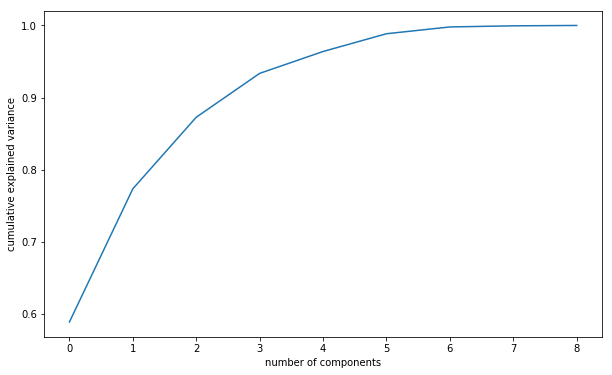

In [14]:
#Plotting the scree plot

%matplotlib inline
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.show()

Around 93% of the information is being explained by 4 components

In [15]:
#Understanding how the original variables are loaded on the principal components. It can be verified from above as well.

colnames = list(Country_df.columns)
pcs_df = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052
1,income,0.380041,0.128384,0.145764,-0.154806
2,inflation,-0.143085,0.221261,0.948419,-0.007628
3,life_expec,0.343857,-0.369820,0.196752,-0.018395
4,total_fer,-0.302842,0.459715,-0.077834,-0.213928
5,gdpp,0.399988,0.200624,0.010339,-0.364772
6,Exports,0.342887,0.397311,-0.030574,0.449425
7,Health,0.358535,0.155053,-0.075703,-0.599712
8,Imports,0.344865,0.370781,-0.072174,0.461798


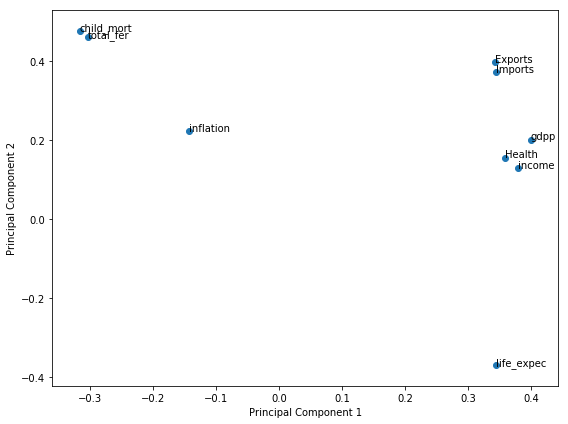

In [16]:
# Let's plot them to visualise how these features are loaded

%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [17]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components

from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [18]:
df_pca = pca_final.fit_transform(Country_df_pca)
df_pca.shape

(167, 4)

In [19]:
df_pca

array([[-2.63664719e+00,  1.47208541e+00, -5.46499687e-01,
         2.37267111e-01],
       [-2.38453563e-02, -1.43581581e+00, -9.07965149e-03,
        -4.42921246e-01],
       [-4.59260048e-01, -6.78793979e-01,  9.67851701e-01,
        -1.76389183e-01],
       [-2.72358099e+00,  2.17601815e+00,  5.97793905e-01,
         4.38918801e-01],
       [ 6.48777079e-01, -1.02649806e+00, -2.44170307e-01,
        -2.67513413e-01],
       [ 3.64467926e-02, -6.84622218e-01,  1.46536060e+00,
         6.60677268e-02],
       [-3.34274149e-01, -1.27903261e+00,  1.90771929e-01,
        -5.01435384e-01],
       [ 3.18436150e+00, -2.38373184e-01, -1.68539991e-01,
         1.66969553e+00],
       [ 3.81813720e+00,  2.62613732e-01, -2.97336122e-01,
         9.74405166e-01],
       [-4.67475427e-01, -4.94060580e-01,  6.08605487e-01,
        -2.58516905e-01],
       [ 1.49957973e+00, -4.25884552e-01, -5.57799928e-01,
         2.24968322e-01],
       [ 1.47129299e+00, -3.25734384e-01,  4.26551347e-01,
      

In [20]:
#Creating a transpose so that the each column is properly arranged

pc = np.transpose(df_pca)


In [21]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [22]:
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


### Outlier Analysis

In [101]:
#Let's do the outlier analysis before proceeding to clustering
#Here we are not removing any Outliers we just analysis

Q1 = pcs_df2.PC1.quantile(0.05)
Q3 = pcs_df2.PC1.quantile(0.95)
IQR = Q3 - Q1
pcs_df_new = pcs_df2[(pcs_df2.PC1 >= Q1 - 1.5*IQR) & (pcs_df2.PC1 <= Q3+1.5*IQR )]

{'whiskers': [<matplotlib.lines.Line2D at 0x464e2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x124c72d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12424dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x124c79d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x124c7a10>],
 'means': []}

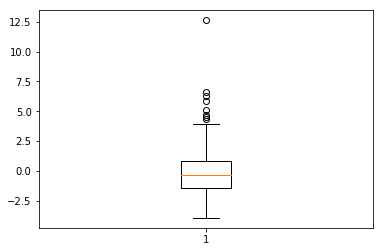

In [102]:
plt.boxplot(pcs_df_new.PC1)

In [103]:

Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df_new = pcs_df2[(pcs_df2.PC2 >=  Q1 - 1.5*IQR ) & (pcs_df2.PC2 <= Q3+1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x12550e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1255e290>,
 'boxes': [<matplotlib.lines.Line2D at 0x12550d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1255e950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1255e990>],
 'means': []}

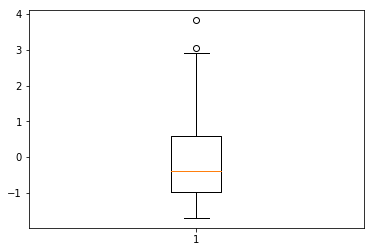

In [104]:
plt.boxplot(pcs_df_new.PC2)

In [105]:
Q1 = pcs_df2.PC2.quantile(0.05)
Q3 = pcs_df2.PC2.quantile(0.95)
IQR = Q3 - Q1
pcs_df_new = pcs_df2[(pcs_df2.PC3 >=  Q1 - 1.5*IQR ) & (pcs_df2.PC3 <= Q3+1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x125cf8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x450d1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xf838370>],
 'medians': [<matplotlib.lines.Line2D at 0x450dcb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x450df70>],
 'means': []}

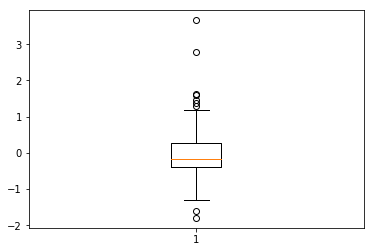

In [106]:
plt.boxplot(pcs_df_new.PC3)

In [107]:
Q1 = pcs_df2.PC4.quantile(0.05)
Q3 = pcs_df2.PC4.quantile(0.95)
IQR = Q3 - Q1
pcs_df_new = pcs_df2[(pcs_df2.PC4 >=  Q1 - 1.5*IQR ) & (pcs_df2.PC2 <= Q3+1.5*IQR)]

{'whiskers': [<matplotlib.lines.Line2D at 0x4512a90>,
 'caps': [<matplotlib.lines.Line2D at 0x125df3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10def5f0>],
 'medians': [<matplotlib.lines.Line2D at 0x125dfad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x125dfb10>],
 'means': []}

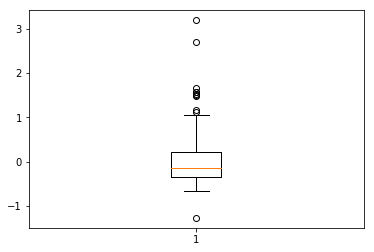

In [108]:
plt.boxplot(pcs_df_new.PC4)

In [27]:
pcs_df2.shape

(167, 4)

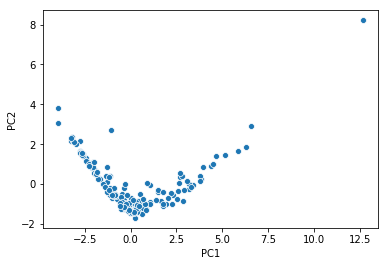

In [28]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data

sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

## Clustering 

### Hopkins statistic

In [29]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [30]:
hopkins(pcs_df2)

0.9216092615630382

In [31]:
dat3_1 = pcs_df2

### silhouette score analysis

In [32]:
#First we'll do the silhouette score analysis
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(dat3_1)
    sse_.append([k, silhouette_score(dat3_1, kmeans.labels_)])

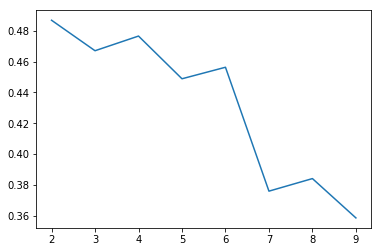

In [33]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

From the above analysis we find that 3 seems to be a good number of clusters for K means algorithm

### elbow curve method

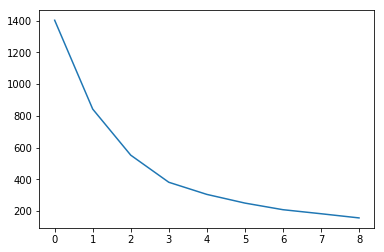

In [34]:

ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(dat3_1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

## KMeans Clustering

In [61]:
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 100)
model_clus2.fit(dat3_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [62]:
datkmeans=pcs_df2
datkmeans.index = pd.RangeIndex(len(datkmeans.index))
dat_km = pd.concat([datkmeans, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.636647,1.472085,-0.546500,0.237267,2
1,-0.023845,-1.435816,-0.009080,-0.442921,1
2,-0.459260,-0.678794,0.967852,-0.176389,1
3,-2.723581,2.176018,0.597794,0.438919,2
4,0.648777,-1.026498,-0.244170,-0.267513,1


In [63]:
dat_km['ClusterID'].value_counts()

1    91
2    48
0    28
Name: ClusterID, dtype: int64

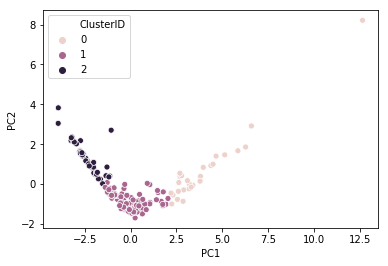

In [64]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [65]:
dat=pd.merge(Country_df,dat_km, left_index=True,right_index=True)
dat.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Health,Imports,PC1,PC2,PC3,PC4,ClusterID
0,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,-2.636647,1.472085,-0.546500,0.237267,2
1,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,-0.023845,-1.435816,-0.009080,-0.442921,1
2,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,-0.459260,-0.678794,0.967852,-0.176389,1
3,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,-2.723581,2.176018,0.597794,0.438919,2
4,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,0.648777,-1.026498,-0.244170,-0.267513,1


In [90]:
dat6=dat.drop(['PC1','PC2','PC3','PC4'],axis=1)
dat6.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Health,Imports,ClusterID
0,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,2
1,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,1
2,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,1
3,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,2
4,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,1


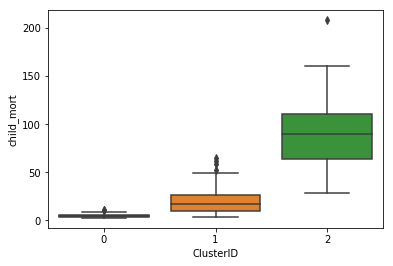

In [67]:
sns.boxplot(x='ClusterID', y='child_mort', data=dat6)

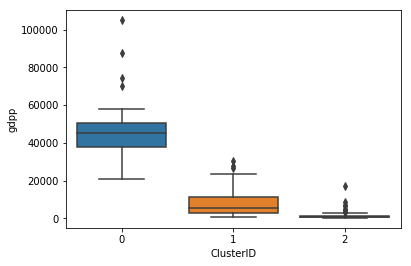

In [68]:
sns.boxplot(x='ClusterID', y='gdpp', data=dat6)

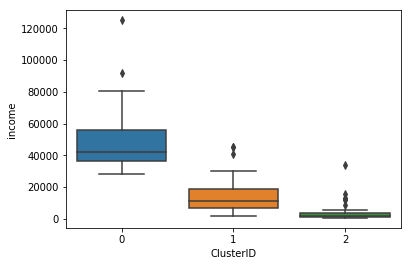

In [69]:
sns.boxplot(x='ClusterID', y='income', data=dat6)

In [70]:
clu_child_mort = pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_gdpp= pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())
clu_income = pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())

In [73]:
df_kmean= pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_gdpp,clu_income], axis=1)

In [74]:
df_kmean.columns = ["ClusterID","child_mort","income","gdpp"]
df_kmean

,ClusterID,child_mort,income,gdpp
0,0,5.046429,48114.285714,50178.571429
1,1,20.357143,7979.912088,13968.021978
2,2,91.610417,1909.208333,3897.354167


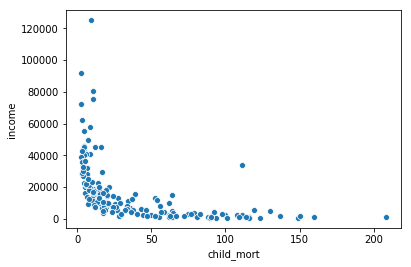

In [88]:
sns.scatterplot(x='child_mort',y='income',data=dat6)

Here we can easily find that if the child mort is high than income of the country is very low. so we can consider that country which have low gdpp and high child mort.

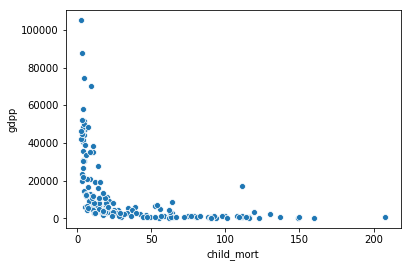

In [89]:
sns.scatterplot(x='child_mort',y='gdpp',data=dat6)

Here we can easily find that if the child mort is high than gdpp of the country is very low. so we can consider that country which have low gdpp and high child mort.

In [110]:
c=Country.loc[(Country.child_mort>=91.610417) &(Country.gdpp<=3897.354167)&(Country.income<=1909.208333)]
c_df= c.sort_values(['child_mort','gdpp','income'],ascending =[False,True, True])
c_df

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Health,Imports
66,Haiti,208.0,1500,5.450,32.1,3.33,662,101.2860,45.7442,428.314
132,Sierra Leone,160.0,1220,17.200,55.0,5.20,399,67.0320,52.2690,137.655
31,Central African Republic,149.0,888,2.010,47.5,5.21,446,52.6280,17.7508,118.190
97,Mali,137.0,1870,4.370,59.5,6.55,708,161.4240,35.2584,248.508
112,Niger,123.0,814,2.550,58.8,7.49,348,77.2560,17.9568,170.868
37,"Congo, Dem. Rep.",116.0,609,20.800,57.5,6.54,334,137.2740,26.4194,165.664
25,Burkina Faso,116.0,1430,6.810,57.9,5.87,575,110.4000,38.7550,170.200
64,Guinea-Bissau,114.0,1390,2.970,55.6,5.05,547,81.5030,46.4950,192.544
17,Benin,111.0,1820,0.885,61.8,5.36,758,180.4040,31.0780,281.976
63,Guinea,109.0,1190,16.100,58.0,5.34,648,196.3440,31.9464,279.936


In [111]:
c_df.shape

(12, 10)

## Hierarchical Clustering

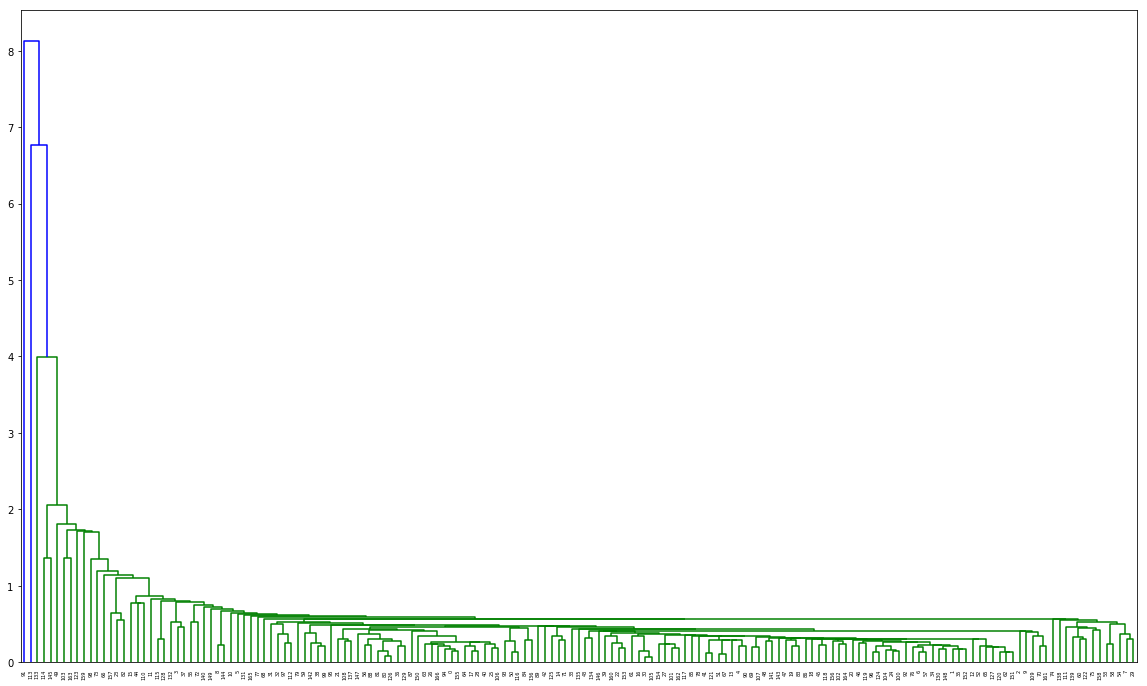

In [77]:
# single linkage
fig = plt.figure(figsize=(20, 12))
mergings = linkage(pcs_df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

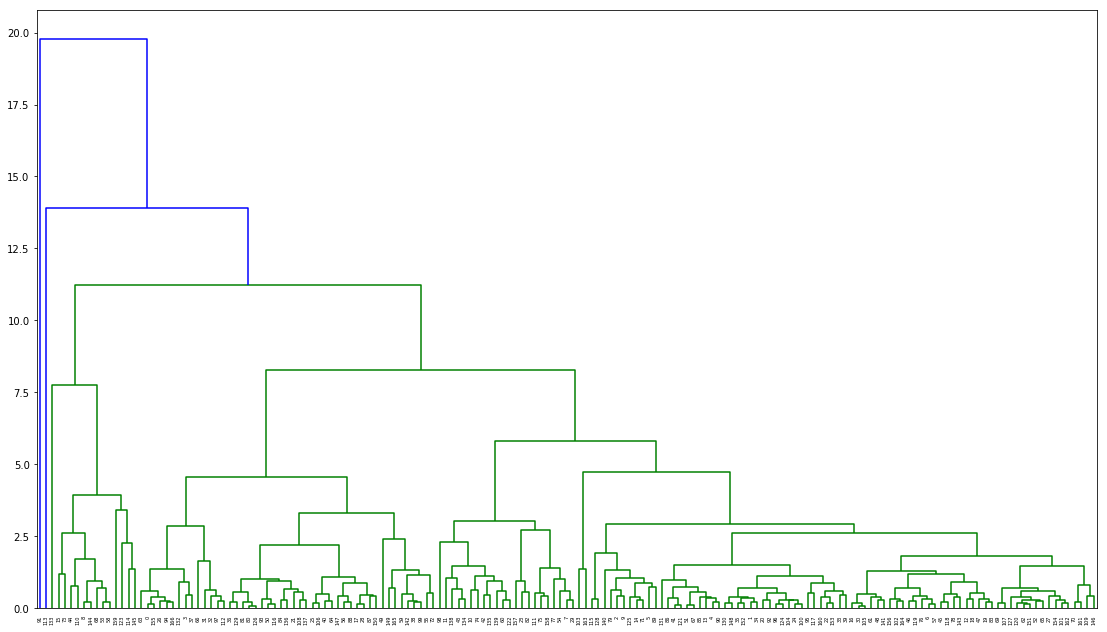

In [78]:
# complete linkage
fig = plt.figure(figsize=(19, 11))
mergings = linkage(datkmeans, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [79]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )


In [91]:
dat6['cluster_labels'] = cluster_labels
dat6.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Health,Imports,ClusterID,cluster_labels
0,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297,2,0
1,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740,1,0
2,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440,1,0
3,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370,2,0
4,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800,1,0


### Hierarchical Clustering Analysis

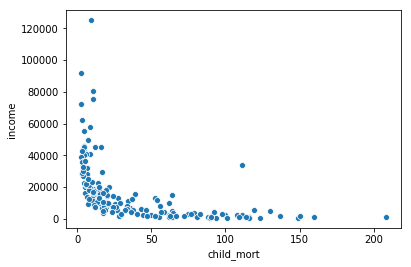

In [99]:
sns.scatterplot(x='child_mort',y='income',data=dat6)

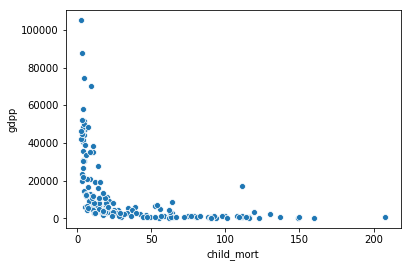

In [100]:
sns.scatterplot(x='child_mort',y='gdpp',data=dat6)

as see above both scatter plot can easily conclude that we have to choose that country which one have high child mort, low gdpp and low income.

In [95]:
clu_child_mort = pd.DataFrame(dat6.groupby(["cluster_labels"]).child_mort.mean())
clu_gdpp= pd.DataFrame(dat6.groupby(["cluster_labels"]).gdpp.mean())
clu_income = pd.DataFrame(dat6.groupby(["cluster_labels"]).income.mean())

In [96]:
df_hcl= pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_gdpp,clu_income], axis=1)

In [97]:
df_hcl.columns = ["cluster_labels","child_mort","income","gdpp"]
df_hcl

,cluster_labels,child_mort,income,gdpp
0,0,37.929091,12470.812121,16765.533333
1,1,2.800000,105000.000000,91700.000000
2,2,130.000000,2330.000000,5150.000000


In [98]:
hcl=Country.loc[(Country.child_mort>=130.000000) &(Country.gdpp<=5150.000000)&(Country.income<=2330.000000)]
hcl

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,Exports,Health,Imports
31,Central African Republic,149.0,888,2.01,47.5,5.21,446,52.628,17.7508,118.190
32,Chad,150.0,1930,6.39,56.5,6.59,897,330.096,40.6341,390.195
66,Haiti,208.0,1500,5.45,32.1,3.33,662,101.286,45.7442,428.314
97,Mali,137.0,1870,4.37,59.5,6.55,708,161.424,35.2584,248.508
132,Sierra Leone,160.0,1220,17.20,55.0,5.20,399,67.032,52.2690,137.655


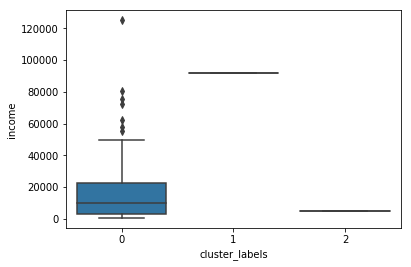

In [92]:
sns.boxplot(x='cluster_labels', y='income', data=dat6)

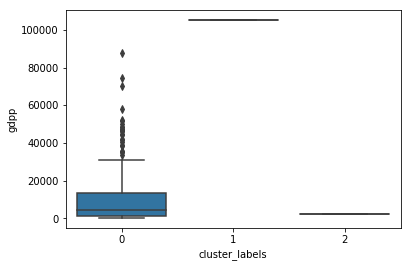

In [93]:
sns.boxplot(x='cluster_labels', y='gdpp', data=dat6)

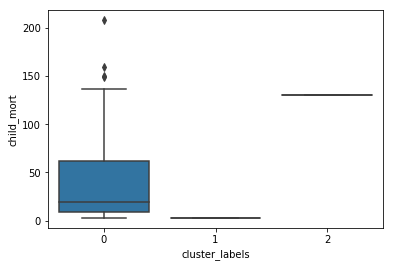

In [94]:
sns.boxplot(x='cluster_labels', y='child_mort', data=dat6)